Import Packages

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [20]:
parent_dir = '../../data/fjcreate/'

df = pd.read_csv(f'{parent_dir}/aggregate_energy_results.csv')


Preview the Data

In [21]:
print("Data:")
print(df.shape)
df.head(11)

Data:
(9, 4)


,Iterations,N,Erlang Energy Consumption(J),Scala Energy Consumption(J)
0,10,50000,32.303589,103.135206
1,10,100000,75.364969,157.685181
2,10,500000,396.591025,446.552042
3,10,1000000,808.137474,1225.891880
4,10,5000000,6426.634181,10305.052959
5,10,10000000,15059.032038,26641.183670
6,10,20000000,36044.321516,73649.201150
7,10,30000000,59705.349220,240924.969756
8,10,40000000,86682.135514,392334.352894


Add Custom Column for N

In [22]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

In [23]:
df['_N'] = "N=" + df['N'].apply(format_number_str)  
df.head(15)

,Iterations,N,Erlang Energy Consumption(J),Scala Energy Consumption(J),_N
0,10,50000,32.303589,103.135206,N=50K
1,10,100000,75.364969,157.685181,N=100K
2,10,500000,396.591025,446.552042,N=500K
3,10,1000000,808.137474,1225.891880,N=1M
4,10,5000000,6426.634181,10305.052959,N=5M
5,10,10000000,15059.032038,26641.183670,N=10M
6,10,20000000,36044.321516,73649.201150,N=20M
7,10,30000000,59705.349220,240924.969756,N=30M
8,10,40000000,86682.135514,392334.352894,N=40M


Visualize the Data

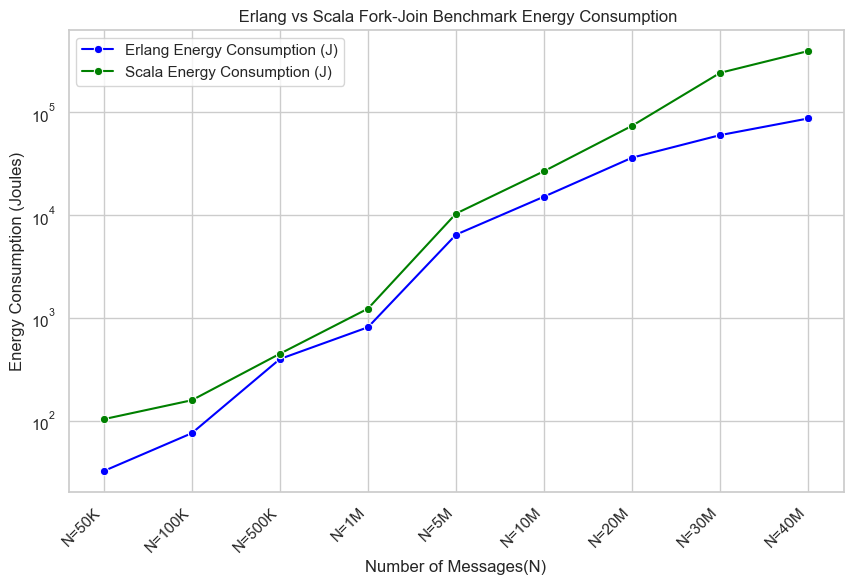

In [24]:
# Set the plot style
sns.set_theme(style="whitegrid", palette="muted")

# Plotting the energy consumption
plt.figure(figsize=(10, 6))

# Plot Erlang and Scala energy consumption
sns.lineplot(x="_N", y="Erlang Energy Consumption(J)", data=df, marker='o', label="Erlang Energy Consumption (J)", color="blue")
sns.lineplot(x="_N", y="Scala Energy Consumption(J)", data=df, marker='o', label="Scala Energy Consumption (J)", color="green")

# Adding labels and title
plt.xlabel("Number of Messages(N)")
plt.ylabel("Energy Consumption (Joules)")
plt.title(" Erlang vs Scala Fork-Join Benchmark Energy Consumption")
# plt.xscale("log")
plt.yscale("log")

# Display legend
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.show()
